继续挑战

---
### 第11题地址[5808.html](http://www.pythonchallenge.com/pc/return/5808.html)
* <img src="http://www.pythonchallenge.com/pc/return/cave.jpg" alt="cave.jpg" width="30%" height="30%">
* 网页标题是`odd even`，题目内容为空，源码也没有隐藏内容

显然图片本身就是题目，而提示信息只有网页标题这个`odd even`——奇偶。<br>
初一看，图片像是两张不同的图片以某种方式叠加而得，但放大一看，其实每隔一个像素就会有一个略黑的像素，结合标题`odd even`，估计是让我们将像素点的坐标按奇偶分下类：

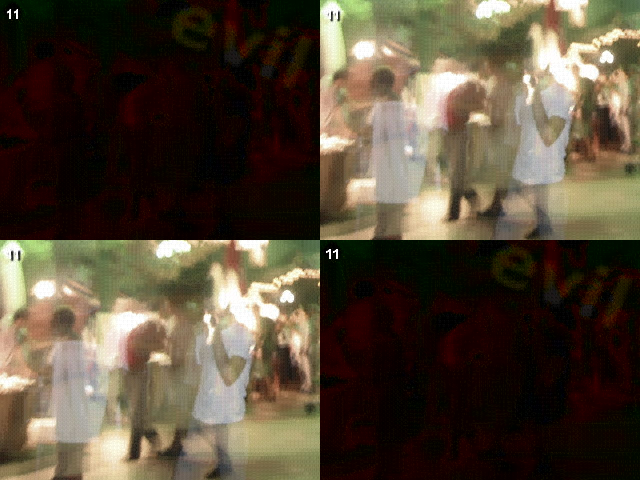

In [1]:
from io import BytesIO
from itertools import product
import requests
from PIL import Image

with requests.Session() as sess:
    sess.auth = ('huge', 'file')
    response = sess.get('http://www.pythonchallenge.com/pc/return/cave.jpg').content
    img = Image.open(BytesIO(response))

img_new = Image.new('RGB', img.size)
for x, y in product(range(img.width), range(img.height)):
    new_x = x // 2 + (x % 2) * (img.width // 2)
    new_y = y // 2 + (y % 2) * (img.height // 2)
    img_new.putpixel((new_x, new_y), img.getpixel((x, y)))
img_new

我们可以看到坐标为(奇,奇)或者(偶,偶)的图片（左上和右下），在黑色背景中隐约有一些图案，事实上我们可以做一下图像增强：

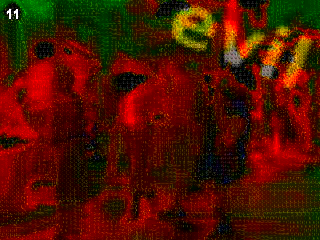

In [2]:
img_new2 = Image.new('RGB', (img.width // 2, img.height // 2))
for x, y in product(range(img.width), range(img.height)):
    if x % 2 == 0 and y % 2 == 0:
        img_new2.putpixel((x // 2, y // 2), tuple(5 * p for p in img.getpixel((x, y))))
img_new2

结果上显示有`evil`字符，修改地址到[evil.html](http://www.pythonchallenge.com/pc/return/evil.html)，打开到下一题，成功！

### 总结：题目信息很少，思路也算比较清晰。图像看不清的时候可以考虑做图像增强。
###### 本题代码地址[11_5808.ipynb](https://github.com/StevenPZChan/pythonchallenge/blob/notebook/nbfiles/11_5808.ipynb)